Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [1]:
NAME = "Mabi Mabbayad"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Read file from remote source
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal_length', 'sepal_width', 'petal_length','petal_width', 'class'])
df.head(5)

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

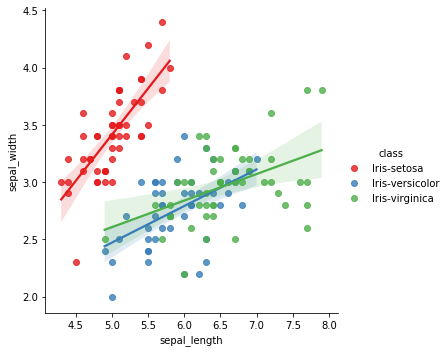

In [7]:
# sepal_width vs sepal_length
sns.lmplot(x='sepal_length', y='sepal_width', hue="class", data=df[['sepal_length', 'sepal_width', 'class']],palette="Set1")

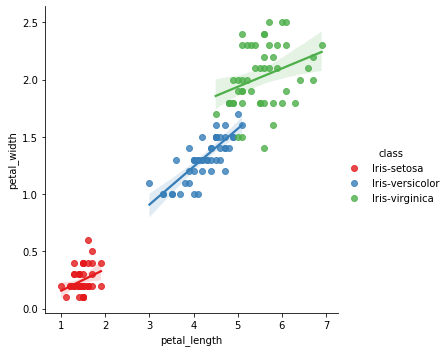

In [8]:
# petal_width vs petal_length
sns.lmplot(x='petal_length', y='petal_width', hue="class", data=df[['petal_length', 'petal_width', 'class']],palette="Set1")

In [9]:
# prepare data for classification
X = df[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
Y = df['class'].values


In [10]:
# split to train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_predictions = knn.predict(X_test)
Y_predictions
np.count_nonzero(Y_predictions == Y_test)/Y_test.size

0.9333333333333333

In [11]:
# Create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# Predict the class from features
Y_predictions = knn.predict(X_test)
Y_predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [13]:
Y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [14]:
# Get the prediction score (percentage)
np.count_nonzero(Y_predictions == Y_test)/Y_test.size



0.9333333333333333

In [15]:
# Get the prediction score from an existing library
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predictions)


0.9333333333333333

In [16]:
#Generate 10 random train/test splits for each value of k
#Fit the model for each split and generate prediction
k_scores = []
k_values = ('1','3','5', '7', '10', '20', '30', '40','50')

for n in range (10):
    scores = []
    counts = []
    for k in (k_values):
        xtrain, xtest, ytrain, ytest = train_test_split(X, Y,train_size=0.70,test_size=0.30,random_state=None)
        knn2 = KNeighborsClassifier(n_neighbors=1)
        knn2.fit(xtrain, ytrain)
        ypred = knn2.predict(xtest)
        k_scores.append([n, k, accuracy_score(ytest, ypred),np.count_nonzero(ypred == ytest)])

#Average the accuracy score for each k
df_k_scores = pd.DataFrame(data=np.array(k_scores), columns=['split_group', 'k','accuracy_score','correct_count'])
df_k_scores = df_k_scores.astype({'accuracy_score': 'float64', 'correct_count': 'float64'})
df_k_ave_accuracy = df_k_scores[['k','accuracy_score']].groupby('k').mean()
df_k_ave_accuracy = df_k_ave_accuracy.reset_index()
df_k_ave_accuracy = df_k_ave_accuracy.astype({'k': 'int16'}).sort_values('k')
df_k_ave_accuracy

k  accuracy_score
0   1        0.962222
3   3        0.937778
6   5        0.953333
8   7        0.973333
1  10        0.946667
2  20        0.966667
4  30        0.964444
5  40        0.942222
7  50        0.948889

In [17]:
#Calculate the average number of correct predictions for each k as well
df_k_ave_correct = df_k_scores[['k','correct_count']].groupby('k').mean()
df_k_ave_correct = df_k_ave_correct.reset_index()
df_k_ave_correct = df_k_ave_correct.astype({'k': 'int16'}).sort_values('k')
df_k_ave_correct

k  correct_count
0   1           43.3
3   3           42.2
6   5           42.9
8   7           43.8
1  10           42.6
2  20           43.5
4  30           43.4
5  40           42.4
7  50           42.7

In [18]:
#Plot the accuracy score for different values of k. What conclusion can you make based on the graph?
df_k_ave_accuracy

k  accuracy_score
0   1        0.962222
3   3        0.937778
6   5        0.953333
8   7        0.973333
1  10        0.946667
2  20        0.966667
4  30        0.964444
5  40        0.942222
7  50        0.948889

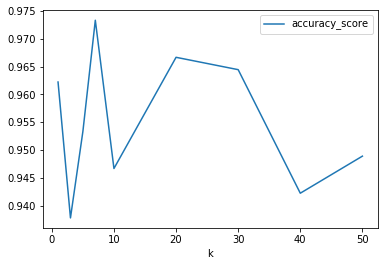

In [19]:
df_k_ave_accuracy.plot(x='k',y='accuracy_score')

Looking at the plot above, the average accuracy for k=7 seems be the highest. This suggest the value of k=7 can be used as the model to train the data for generating predictions. We can validate if the average is the general trend for the 10 split groups that were created.[**Trend changes every time I rerun :)]

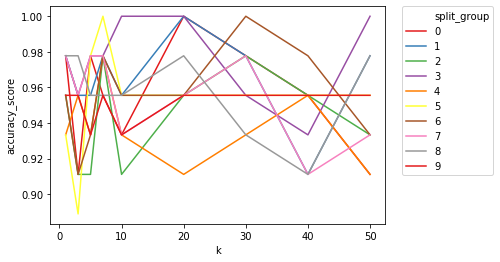

In [20]:
df_k_scores = df_k_scores.astype({'k': 'int16', 'split_group':'int16'}).sort_values('k')
#df_k_scores.info()
#df_k_scores
sns.lineplot(x="k", y="accuracy_score", hue="split_group",data=df_k_scores,palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Based on the plot above, the train/test dataset influences the most accurate k value that can be used to produce the most accurate model for predictions. But since the accuracy scores are all within 90%, the k value that is used will still translate to a highly accurate prediction. This to me suggests that the attributes of an iris in this dataset are attributes that can 90% of the time be indicative of the correct species.